<a href="https://colab.research.google.com/github/mdoghan/CaterpillarCustomerDashboard/blob/main/Caterpillar_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setting Up the Environment**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import numpy as np


In [11]:
import seaborn as sns

In [12]:
data = pd.read_csv('hmd_python.csv')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hmd_python.csv to hmd_python (1).csv


In [81]:

# Basic data overview
print("First five rows of the data:")
print(data.head())
print("\nSummary of the data:")
print(data.info())


First five rows of the data:
    Invoice   TransactionDate      DeliveryDate EmpKey  ChannelKey StoreID  \
0  E1072592  Tue Jan 01, 2002  Tue Jan 22, 2002    E04           9   IN288   
1  E1072593  Tue Jan 01, 2002  Wed Jan 16, 2002    E12           9   BZ118   
2  E1072594  Tue Jan 01, 2002  Mon Jan 21, 2002    E02           3   NM120   
3  E1072595  Tue Jan 01, 2002  Thu Jan 31, 2002    E07           4   US213   
4  E1072596  Tue Jan 01, 2002  Mon Jan 21, 2002    E03           3   US219   

  ProductKey  CustomerKey  Qty   Cost  Price  \
0     FL-125           72    1   1472   1958   
1     RP-243           47    1   6618   9265   
2     RD-516           48    2  10672  12593   
3     BZ-801           73    1   3013   4007   
4     BZ-812           16    1   7396   9171   

                         ProductDescription     Brand       Type        Color  \
0  ForkLifts-Bradshaw-HeavyDuty-YellowBlack  Bradshaw  HeavyDuty  YellowBlack   
1    RoadPavers-Raygo-LightDuty-WhiteYellow     Ray

In [15]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())


Descriptive statistics:
          ChannelKey    CustomerKey            Qty           Cost  \
count  806485.000000  806485.000000  806485.000000  806485.000000   
mean        5.499831     852.437599       1.005514    6642.580132   
std         2.873076     729.955726       0.555062    5103.335241   
min         1.000000       1.000000       1.000000    1309.000000   
25%         3.000000     293.000000       1.000000    3266.000000   
50%         6.000000     647.000000       1.000000    5643.000000   
75%         8.000000    1218.000000       1.000000    7967.000000   
max        10.000000    4212.000000     100.000000   33029.000000   

               Price  
count  806485.000000  
mean     8009.369146  
std      6161.158810  
min      1606.000000  
25%      3881.000000  
50%      6748.000000  
75%      9765.000000  
max     44731.000000  


**Exploratory Data Analysis**

In [35]:
# Number of Columns
hmd_python.shape[1]


20

In [36]:
# Name of Columns
hmd_python.columns

Index(['Invoice', 'TransactionDate', 'DeliveryDate', 'EmpKey', 'ChannelKey',
       'StoreID', 'ProductKey', 'CustomerKey', 'Qty', 'Cost', 'Price',
       'ProductDescription', 'Brand', 'Type', 'Color', 'CityName',
       'CountryName', 'Channel', 'CustomerName', 'Industry'],
      dtype='object')

In [37]:
# Number of Rows
hmd_python.shape[0]

806485

In [39]:
# Data types for columns
hmd_python.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806485 entries, 0 to 806484
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Invoice             806485 non-null  object
 1   TransactionDate     806485 non-null  object
 2   DeliveryDate        806485 non-null  object
 3   EmpKey              806485 non-null  object
 4   ChannelKey          806485 non-null  int64 
 5   StoreID             806485 non-null  object
 6   ProductKey          806485 non-null  object
 7   CustomerKey         806485 non-null  int64 
 8   Qty                 806485 non-null  int64 
 9   Cost                806485 non-null  int64 
 10  Price               806485 non-null  int64 
 11  ProductDescription  806485 non-null  object
 12  Brand               806485 non-null  object
 13  Type                806485 non-null  object
 14  Color               806485 non-null  object
 15  CityName            806485 non-null  object
 16  Co

**Part 1: Data Categorization and Cleaning**

In [40]:
# Finding Duplicates
hmd_python.duplicated().any()

False

In [41]:
# drop duplicates
hmd_python.drop_duplicates(inplace=True)

In [42]:
# Displaying shape prior to dropping duplicates
hmd_python.shape

(806485, 20)

In [43]:
# Displaying shape after dropping duplicates
hmd_python.shape

(806485, 20)

In [44]:
# Displaying numeric columns
numeric_cols = hmd_python.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['ChannelKey', 'CustomerKey', 'Qty', 'Cost', 'Price'], dtype='object')

In [45]:
# Display non-numeric columms
cat_cols = hmd_python.select_dtypes(exclude=[np.number]).columns
cat_cols

Index(['Invoice', 'TransactionDate', 'DeliveryDate', 'EmpKey', 'StoreID',
       'ProductKey', 'ProductDescription', 'Brand', 'Type', 'Color',
       'CityName', 'CountryName', 'Channel', 'CustomerName', 'Industry'],
      dtype='object')

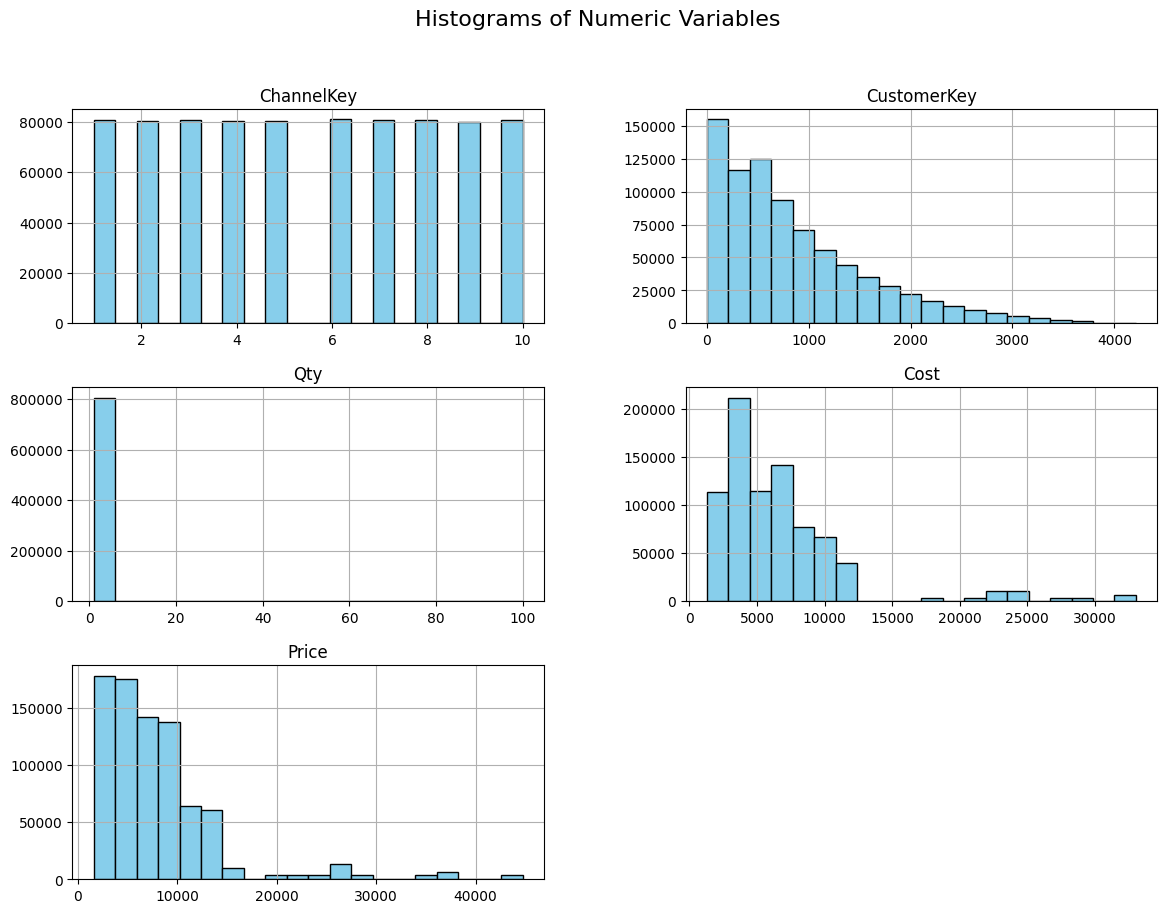

In [103]:
# Select numeric columns for analysis
numeric_cols = ['ChannelKey', 'CustomerKey', 'Qty', 'Cost', 'Price']

# Plot histograms to observe the distribution of numeric variables
data[numeric_cols].hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Variables', fontsize=16)
plt.show()

In [46]:
# Find percentage of missing values for each column in the dataset
for col in hmd_python.columns:
  percentage_of_missing = np.mean(hmd_python[col].isnull())
  print('{} - {}%' .format(col, round(percentage_of_missing*100)))

Invoice - 0%
TransactionDate - 0%
DeliveryDate - 0%
EmpKey - 0%
ChannelKey - 0%
StoreID - 0%
ProductKey - 0%
CustomerKey - 0%
Qty - 0%
Cost - 0%
Price - 0%
ProductDescription - 0%
Brand - 0%
Type - 0%
Color - 0%
CityName - 0%
CountryName - 0%
Channel - 0%
CustomerName - 0%
Industry - 0%


In [51]:
# saving an imputed copy
imputed_df = hmd_python

In [57]:
#impute missing values less than 2% with the median of the data in the numeric feature.
for col in imputed_df.columns:
   if col in imputed_df.select_dtypes(include=[np.number]).columns and percentage_of_missing < 0.02:
    imputed_df[col] = imputed_df[col].fillna(imputed_df[col].median())



In [58]:
#impute missing values less than 5% with the mode of the data in the numeric feature.
for col in imputed_df.columns:
   if col in imputed_df.select_dtypes(include=[np.number]).columns and percentage_of_missing < 0.05:
    imputed_df[col] = imputed_df[col].fillna(imputed_df[col].mode())



In [63]:
# Replace non-numeric missing values with the word '_NA_' for any feature with less than 5% missing values.
for col in imputed_df.columns:
    if col in imputed_df.select_dtypes(exclude=[np.number]).columns and percentage_of_missing < 0.05:
      imputed_df[col] = imputed_df[col].fillna('_NA_')


In [64]:
# Replace all non-numeric missing values less than 5% with the most frequent value for the feature (mode).
for col in imputed_df.columns:
    if col in imputed_df.select_dtypes(exclude=[np.number]).columns and percentage_of_missing < 0.05:
      imputed_df[col] = imputed_df[col].fillna(imputed_df[col].mode())

In [66]:
# Replace any remaining missing numeric value with 0
for col in imputed_df.columns:
    if col in imputed_df.select_dtypes(include=[np.number]).columns:
      imputed_df[col] = imputed_df[col].fillna(0)


In [67]:
# Replace any remaining non-numeric value with the word '_MISSING_'
for col in imputed_df.columns:
    if col in imputed_df.select_dtypes(exclude=[np.number]).columns:
        imputed_df[col] = imputed_df[col].fillna('_MISSING_')

In [68]:
# Calcutes the upper and lower limits
for col in imputed_df.select_dtypes(include=['number']).columns:
    upper_limit = imputed_df[col].mean() + 3*imputed_df[col].std()
    lower_limit = imputed_df[col].mean() - 3*imputed_df[col].std()
    print(f"Upper limit for '{col}':", upper_limit)
    print(f"Lower limit for '{col}':", lower_limit)

Upper limit for 'ChannelKey': 14.119060081568211
Lower limit for 'ChannelKey': -3.1193985875540626
Upper limit for 'CustomerKey': 3042.304775985027
Lower limit for 'CustomerKey': -1337.4295780582213
Upper limit for 'Qty': 2.6706991791115415
Lower limit for 'Qty': -0.6596710756750241
Upper limit for 'Cost': 21952.585856645015
Lower limit for 'Cost': -8667.42559203997
Upper limit for 'Price': 26492.84557686955
Lower limit for 'Price': -10474.107284154867


In [70]:
# Find the outliers
imputed_df.loc[(imputed_df[col] > upper_limit) | (imputed_df[col] < lower_limit)]

,Invoice,TransactionDate,DeliveryDate,EmpKey,ChannelKey,StoreID,ProductKey,CustomerKey,Qty,Cost,Price,ProductDescription,Brand,Type,Color,CityName,CountryName,Channel,CustomerName,Industry
38,E1072630,"Tue Jan 01, 2002","Thu Jan 31, 2002",E08,7,JP278,OR-894,89,1,23037,27414,OilRigs-Radoil-Standard-Red,Radoil,Standard,Red,Tokyo,Japan,RoadShow,Woolworths,Retail
132,E1072724,"Tue Jan 01, 2002","Tue Jan 15, 2002",E07,3,SA206,OR-899,67,1,23584,29244,OilRigs-Polycrest-LightDuty-Green,Polycrest,LightDuty,Green,Capetown,SouthAfrica,Magazine,Saudi Aramco,Oil&Gas
182,E1072774,"Tue Jan 01, 2002","Tue Jan 15, 2002",E09,3,SW245,OR-898,89,1,33029,37323,OilRigs-DGFritt-LightDuty-Black,DGFritt,LightDuty,Black,Zurich,Switzerland,Magazine,Woolworths,Retail
203,E1072795,"Tue Jan 01, 2002","Tue Jan 22, 2002",E11,6,UK130,OR-895,47,1,32414,44731,OilRigs-AtlasCopco-Standard-Red,AtlasCopco,Standard,Red,NewCastle,UK,SocialMedia,LGCorp,Conglomerate
236,E1072828,"Wed Jan 02, 2002","Wed Jan 16, 2002",E04,9,IT566,OR-896,27,1,27103,34963,OilRigs-Dabuccino-HeavyDuty-Red,Dabuccino,HeavyDuty,Red,Genoa,Italy,Brochure,Eni,Oil&Gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806055,E1878473,"Sat Dec 29, 2012","Sat Jan 12, 2013",E06,3,CH243,OR-896,570,1,27103,34963,OilRigs-Dabuccino-HeavyDuty-Red,Dabuccino,HeavyDuty,Red,Taipei,China,Magazine,Adham Bescoby,Reseller
806216,E1878634,"Sat Dec 29, 2012","Mon Jan 28, 2013",E06,9,RU355,OR-894,2069,1,23037,27414,OilRigs-Radoil-Standard-Red,Radoil,Standard,Red,Chelyabinsk,Russia,Brochure,Karoline E Larsen,Reseller
806343,E1878761,"Mon Dec 31, 2012","Mon Jan 21, 2013",E14,2,NG455,OR-895,2375,1,32414,44731,OilRigs-AtlasCopco-Standard-Red,AtlasCopco,Standard,Red,Lagos,Nigeria,InternetReview,Fructuoso R Estrada,Reseller
806357,E1878775,"Mon Dec 31, 2012","Mon Jan 21, 2013",E01,4,US212,OR-895,521,1,32414,44731,OilRigs-AtlasCopco-Standard-Red,AtlasCopco,Standard,Red,Houston,US,CustomerReview,Madelle Oldfield-Cherry,Reseller


In [71]:
# Drop the outliers
clean_df = imputed_df.loc[(imputed_df[col] < upper_limit) & (imputed_df[col] > lower_limit)]
print('Before removing outliers:',len(imputed_df))
print('After removing outliers:',len(clean_df))
print('Outliers:', len(imputed_df)-len(clean_df))

Before removing outliers: 806485
After removing outliers: 786213
Outliers: 20272


**Part 2: Descriptive Statistics**



In [121]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())



Descriptive statistics:
          ChannelKey    CustomerKey            Qty           Cost  \
count  806485.000000  806485.000000  806485.000000  806485.000000   
mean        5.499831     852.437599       1.005514    6642.580132   
std         2.873076     729.955726       0.555062    5103.335241   
min         1.000000       1.000000       1.000000    1309.000000   
25%         3.000000     293.000000       1.000000    3266.000000   
50%         6.000000     647.000000       1.000000    5643.000000   
75%         8.000000    1218.000000       1.000000    7967.000000   
max        10.000000    4212.000000     100.000000   33029.000000   

               Price         Profit       Revenue  
count  806485.000000  806485.000000  8.064850e+05  
mean     8009.369146    1366.789014  8.055614e+03  
std      6161.158810    1368.965742  8.539120e+03  
min      1606.000000   -2108.000000  1.606000e+03  
25%      3881.000000     549.000000  3.881000e+03  
50%      6748.000000     957.000000  6.74

In [73]:
clean_df.describe()

,ChannelKey,CustomerKey,Qty,Cost,Price
count,786213.000000,786213.000000,786213.000000,786213.000000,786213.000000
mean,5.500152,852.412935,1.005590,6092.898112,7309.682089
std,2.873258,729.909783,0.559639,3782.669337,4315.503239
min,1.000000,1.000000,1.000000,1309.000000,1606.000000
25%,3.000000,293.000000,1.000000,3261.000000,3853.000000
50%,6.000000,647.000000,1.000000,5531.000000,6648.000000
75%,8.000000,1217.000000,1.000000,7788.000000,9524.000000
max,10.000000,4212.000000,100.000000,24826.000000,26450.000000


In [79]:
df = pd.DataFrame(data)

In [93]:
# Create a sale column
imputed_df['sales'] = imputed_df['Qty'] * imputed_df['Price']


In [95]:
# Create a Profit column
imputed_df['profit'] = df['sales'] - df['Cost']

In [92]:
# Grouping the data by 'Brand' and summarizing 'Sales'
Brand_df = imputed_df.groupby('Brand')['sales'].agg(['mean', 'median', 'std']).round(2)

# Print summary statistics of 'Sales' by 'Brand'
print("Summary statistics of Sales by Brand:")
print(Brand_df)

Summary statistics of Sales by Brand:
                   mean   median       std
Brand                                     
AFM             7491.69   7410.0   4309.55
Akkerman        7920.87   3500.0   4506.78
Allatt         10465.25  10102.0  14982.45
AllisChalmers  13327.00  13327.0      0.00
Ascom           1649.99   1649.0     57.16
...                 ...      ...       ...
Wirtgen         6145.13   7205.0   5759.79
Wylie           4194.00   4194.0      0.00
Xuzhou          6593.91   6592.0    112.23
Zeeco          26561.58  25856.0  41190.26
Zeppelin        4782.00   4607.0   7809.74

[163 rows x 3 columns]


In [96]:
# Most frequent value for each non-numeric feature
for col in cat_cols:
    most_freq_value= imputed_df[col].mode()[0]
    print(f"Column: {col}")
    print(f"Most frequent value: {most_freq_value}")

Column: Invoice
Most frequent value: E1514517
Column: TransactionDate
Most frequent value: Sat Sep 15, 2012
Column: DeliveryDate
Most frequent value: Thu Jan 18, 2007
Column: EmpKey
Most frequent value: E03
Column: StoreID
Most frequent value: FR239
Column: ProductKey
Most frequent value: EM-693
Column: ProductDescription
Most frequent value: EarthMovers-Noram-LightDuty-Black
Column: Brand
Most frequent value: Caterpillar
Column: Type
Most frequent value: LightDuty
Column: Color
Most frequent value: White
Column: CityName
Most frequent value: Brordeaux
Column: CountryName
Most frequent value: US
Column: Channel
Most frequent value: SocialMedia
Column: CustomerName
Most frequent value: Walmart
Column: Industry
Most frequent value: Reseller


In [97]:
# The unique values for each non-numeric feature
for col in cat_cols:
    unique_values = imputed_df[col].unique()
    print(F"Unique values for column '{col}': {unique_values}")

Unique values for column 'Invoice': ['E1072592' 'E1072593' 'E1072594' ... 'E1878900' 'E1878901' 'E1878902']
Unique values for column 'TransactionDate': ['Tue Jan 01, 2002' 'Wed Jan 02, 2002' 'Thu Jan 03, 2002' ...
 'Mon Dec 31, 2012' 'Tue Jan 01, 2013' 'Wed Jan 02, 2013']
Unique values for column 'DeliveryDate': ['Tue Jan 22, 2002' 'Wed Jan 16, 2002' 'Mon Jan 21, 2002' ...
 'Wed Jan 30, 2013' 'Fri Feb 01, 2013' 'Thu Jan 31, 2013']
Unique values for column 'EmpKey': ['E04' 'E12' 'E02' 'E07' 'E03' 'E13' 'E09' 'E06' 'E10' 'E01' 'E15' 'E14'
 'E08' 'E11' 'E05']
Unique values for column 'StoreID': ['IN288' 'BZ118' 'NM120' 'US213' 'US219' 'JP278' 'NT780' 'OC712' 'SH120'
 'US215' 'VZ310' 'US211' 'AN566' 'IN487' 'GR443' 'UK130' 'OC694' 'SA208'
 'SW245' 'UK128' 'OC714' 'OC689' 'GR445' 'US214' 'UK129' 'KN732' 'NT781'
 'CH243' 'FR787' 'CH222' 'UK121' 'NT779' 'OC693' 'CG256' 'US212' 'BW288'
 'TW992' 'IT566' 'US217' 'UA664' 'MX811' 'CH232' 'UA665' 'EH398' 'RU356'
 'TW900' 'BZ242' 'US218' 'OC691' 'JP

In [24]:
# Confirm missing values have been removed
print("\nMissing data after dropping rows with missing values:")
print(data_cleaned.isnull().sum())


Missing data after dropping rows with missing values:
Invoice               0
TransactionDate       0
DeliveryDate          0
EmpKey                0
ChannelKey            0
StoreID               0
ProductKey            0
CustomerKey           0
Qty                   0
Cost                  0
Price                 0
ProductDescription    0
Brand                 0
Type                  0
Color                 0
CityName              0
CountryName           0
Channel               0
CustomerName          0
Industry              0
dtype: int64


**Part 3: Data Visualization**

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

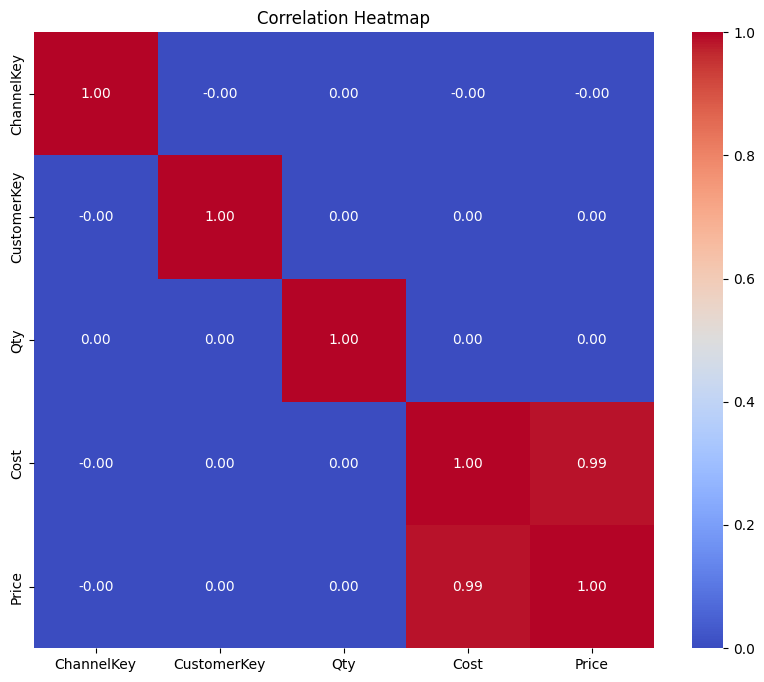

In [101]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [138]:
# Q:  which products are most profitable?
data['Profit'] = data['Price'] - data['Cost']

top_brands =data.groupby('Brand')['Qty'].sum().nlargest(10).index
top_brands = data[data['Brand'].isin(top_brands)]
most_profitable_products = top_brands.groupby(['Brand', 'ProductDescription'])['Profit'].sum().reset_index()
most_profitable_products = most_profitable_products.sort_values('Profit', ascending=False).drop_duplicates('Brand')


most_profitable_products[['Brand', 'ProductDescription', 'Profit']]


,Brand,ProductDescription,Profit
32,IngersollRand,RockDrillers-IngersollRand-Standard-White,12583943
8,Caterpillar,Dredgers-Caterpillar-LightDuty-Yellow,10458126
1,Bobcat,EarthMovers-Bobcat-LightDuty-RedWhite,10223196
24,Hitachi,DumpTrucks-Hitachi-HeavyDuty-Green,9998014
45,Komatsu,DumpTrucks-Komatsu-HeavyDuty-YellowBlack,8382542
49,Liebherr,Cranes-Liebherr-Standard-Red,8187012
39,JohnDeere,EarthMovers-JohnDeere-Standard-Red,7172968
38,JCB,Tractors-JCB-HeavyDuty-White,7143696
59,Volvo,RoadPavers-Volvo-HeavyDuty-GreenWhite,6225136
20,Ford,MiningTrucks-Ford-LightDuty-Yellow,5932136


        Brand ProductKey    Revenue
0  AtlasCopco     OR-895  150206698
1     Mollier     OR-889  127063420
2     DGFritt     OR-898  125367957
3   Dabuccino     OR-896  118105014
4   Polycrest     OR-899  101301216
5      Radoil     OR-894   91973970
6     Oakford     OR-893   90644150
7       Zeeco     OR-900   90521856
8    Transfor     OR-891   86097557
9       Warco     OR-897   79595502


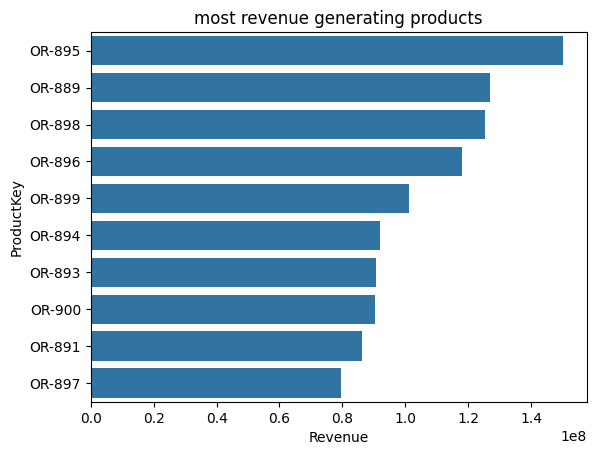

In [134]:
# what products are generating the most revenew?

data['Revenue'] = data['Price'] * data['Qty']
data['Profit'] = data['Revenue'] - data['Cost']
most_revenue_generating_products = data.groupby(['Brand', 'ProductKey'])['Revenue'].sum().sort_values(ascending=False).head(10)

# Convert most_revenue_generating_products to a DataFrame for plotting
most_revenue_generating_products_df = most_revenue_generating_products.reset_index()

print(most_revenue_generating_products_df)

plt.title('most revenue generating products')
# Use 'ProductDescription' for x and 'Revenue' for y in the barplot
sns.barplot(x='Revenue', y='ProductKey', data=most_revenue_generating_products_df);

Text(0.5, 1.0, 'Monthly Sales Trends from 2002 to 2012')

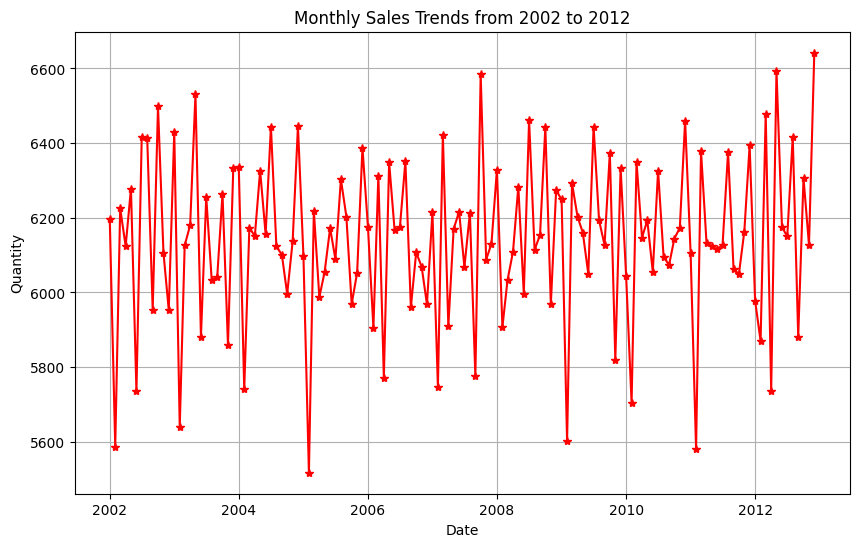

In [ ]:
# Q3 what are the montly sales trends from 2002 to 2012
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

data['Year'] = data['TransactionDate'].dt.year
data['Month'] = data['TransactionDate'].dt.month

sales_btw_2002_2012 = data[(data['Year'] >= 2002) & (data['Year'] <= 2012)]
monthly_sales = sales_btw_2002_2012.groupby(['Year', 'Month'])['Qty'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year','Month']].assign(day=1))

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Qty'], marker='*', linestyle='-', color='red')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Monthly Sales Trends from 2002 to 2012')




          Channel      Price
7     SocialMedia  650392736
9         Website  649297674
5         Quality  647896846
4      OnSiteDemo  647845154
6        RoadShow  647329334
3        Magazine  647040406
1  CustomerReview  644770648
2  InternetReview  643791193
8      Television  642157240
0        Brochure  638914845


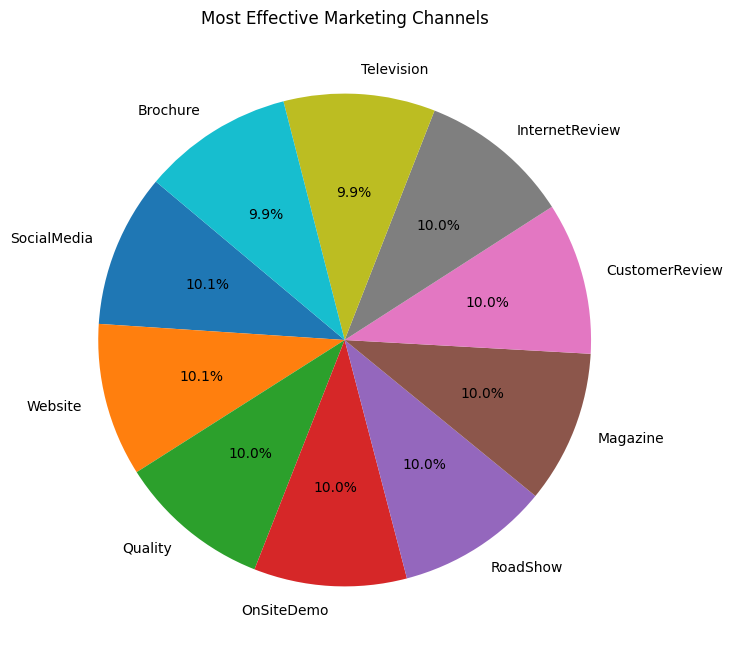

In [139]:
# Q4   what are the most effective marketing channels?
marketing_channels = data.groupby('Channel')['Price'].sum().reset_index()
marketing_channels = marketing_channels.sort_values(by='Price', ascending=False)

print(marketing_channels)

#Pie chart of most effective marketing channels
plt.figure(figsize=(8, 8))
plt.pie(marketing_channels['Price'], labels=marketing_channels['Channel'], autopct='%1.1f%%', startangle=140)
plt.title('Most Effective Marketing Channels')
plt.show()

   CountryName      Price
34          US  697506179
1    Australia  545437650
12       India  312055952
32         UAE  311026620
4        China  310623034
     CityName     Price
45  Melbourne  79609705
34     Kigali  79509927
76      Tunis  79438303
36    Kolkata  79181877
73     Taipei  79054103


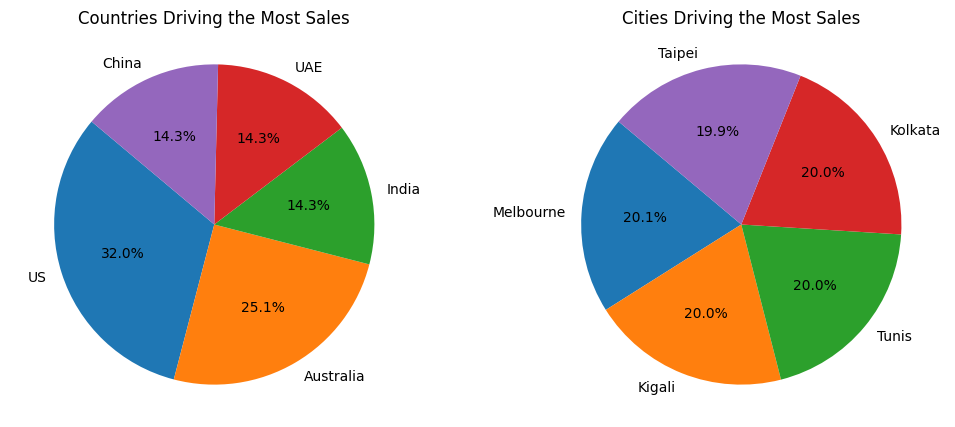

In [144]:
# Q which regions are driving the most sales?
Region_with_high_sales_country = data.groupby('CountryName')['Price'].sum().reset_index()
Region_with_high_sales_country = Region_with_high_sales_country.sort_values(by='Price', ascending=False).head(5)

print(Region_with_high_sales_country)



# Q which cities are driving the most sales?
Region_with_high_sales_city = data.groupby('CityName')['Price'].sum().reset_index()
Region_with_high_sales_city = Region_with_high_sales_city.sort_values(by='Price', ascending=False).head(5)

print(Region_with_high_sales_city)


#Pie chart of countries and cities taht driving the most sales!
plt.figure(figsize=(10, 5))

# Pie chart for countries
plt.subplot(1, 2, 1)
# Use Region_with_high_sales_country for the country data
plt.pie(Region_with_high_sales_country['Price'], labels=Region_with_high_sales_country['CountryName'], autopct='%1.1f%%', startangle=140)
plt.title('Countries Driving the Most Sales')
plt.axis('equal')

# Pie chart for cities
plt.subplot(1, 2, 2)
# Use Region_with_high_sales_city for the city data
plt.pie(Region_with_high_sales_city['Price'], labels=Region_with_high_sales_city['CityName'], autopct='%1.1f%%', startangle=140)
plt.title('Cities Driving the Most Sales')
plt.axis('equal')

plt.tight_layout()

plt.subplots_adjust(top=0.8)

plt.show()

ProductKey
RP-243    3544
EM-693    3540
DT-807    3535
Name: Qty, dtype: int64


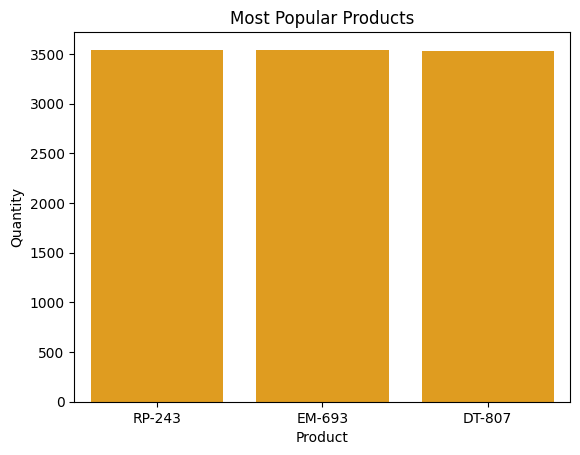

In [117]:
#  PRODUCT ANALYSIS

# Q what are the most popular products
most_popular_products = data.groupby('ProductKey')['Qty'].sum().sort_values(ascending=False).head(3)

print(most_popular_products)

sns.barplot(x=most_popular_products.index, y=most_popular_products.values, color='orange')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Most Popular Products')
plt.show()


In [ ]:
# Q which products are trending?
trending_products = data.groupby('ProductKey')['Qty'].sum().sort_values(ascending=False).head(3)

print(trending_products)

ProductKey
EM-693    3540
WT-218    3519
CT-721    3519
Name: Qty, dtype: int32


In [ ]:
# Q which products have the highest margins?
data['Hight_profit_Margin'] = data['Revenue'] - data['Cost']
margin_by_product = data.groupby('ProductKey')['Hight_profit_Margin'].sum().sort_values(ascending=False).head(3)

print(margin_by_product)

ProductKey
OR-895    41360486
OR-889    29322590
OR-896    26511780
Name: Hight_profit_Margin, dtype: int64


ProductKey
IB-404    11
TB-245    10
LC-201     9
Name: Qty, dtype: int32


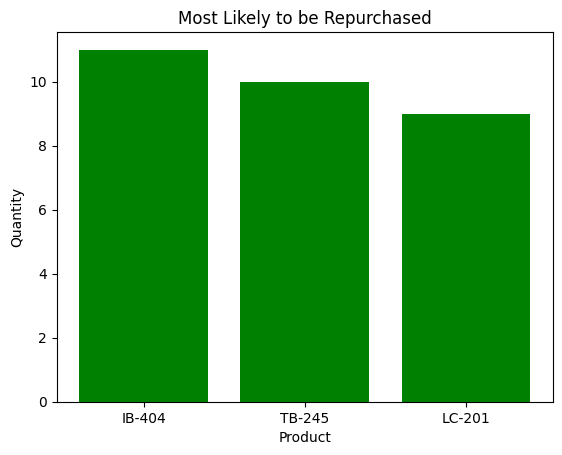

In [ ]:
# Q5 which products are most likely to be repurchased?
repurchased_products = data[data['CustomerKey'] == 1].groupby('ProductKey')['Qty'].sum().sort_values(ascending=False).head(3)

print(repurchased_products)


#visualize
plt.bar(repurchased_products.index, repurchased_products.values, color='Green')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Most Likely to be Repurchased')
plt.show()

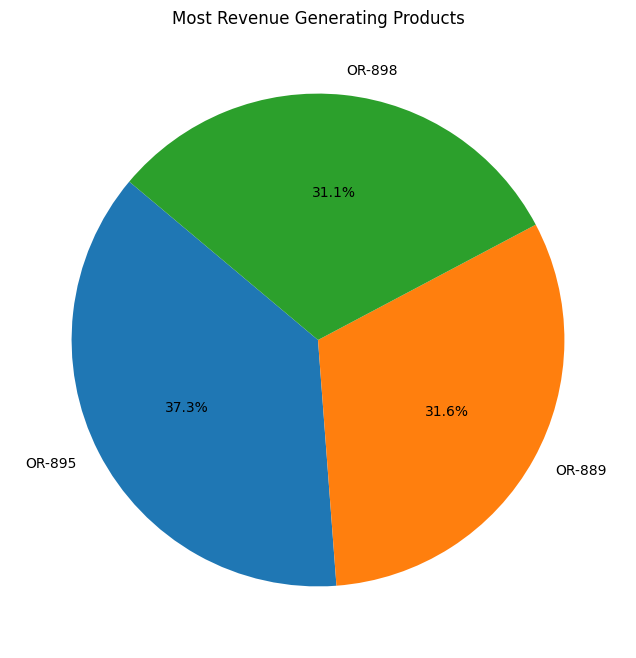

In [120]:
# pie chart of which products are generating the most revenue?
data['Revenue'] = data['Price'] * data['Qty']
revenue_by_product = data.groupby('ProductKey')['Revenue'].sum().sort_values(ascending=False).head(3)

plt.figure(figsize=(8, 8))
plt.pie(revenue_by_product, labels=revenue_by_product.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Revenue Generating Products')
plt.show()